# SCC0275: Introdução a Ciência de Dados - 1o Semestre de 2021
# SCC0275 - Exercício 4

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.   Stefan Taiguara Couperus Leal - 10414866


In [1]:
import pandas as pd
import seaborn as sns 

data = pd.read_csv("dataset_hepatitis.csv", na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    int64  
 1   SEX              155 non-null    object 
 2   STEROID          154 non-null    object 
 3   ANTIVIRALS       155 non-null    object 
 4   FATIGUE          154 non-null    object 
 5   MALAISE          154 non-null    object 
 6   ANOREXIA         154 non-null    object 
 7   LIVER_BIG        145 non-null    object 
 8   LIVER_FIRM       144 non-null    object 
 9   SPLEEN_PALPABLE  150 non-null    object 
 10  SPIDERS          150 non-null    object 
 11  ASCITES          150 non-null    object 
 12  VARICES          150 non-null    object 
 13  BILIRUBIN        149 non-null    float64
 14  ALK_PHOSPHATE    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  ALBUMIN          139 non-null    float64
 17  PROTIME         

In [2]:
data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1.0,85.0,18.0,4.0,NaN,no,1
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,1
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96.0,32.0,4.0,NaN,no,1
3,31,female,NaN,yes,no,no,no,yes,no,no,no,no,no,0.7,46.0,52.0,4.0,80.0,no,1
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1.0,NaN,200.0,4.0,NaN,no,1


# Questão 1

- a) Mostre que o atributo "BILIRUBIN" contém outliers
- b) Para o atributo citado, calcule a cerca inferior (LF) e superior (UF) para cada um dos atributos. Substitua o valor dos outliers pela cerca mais próxima (consultar Aula 3!). Para ser considerados outlier, os valores devem estar fora dos limites das cercas inferior ou superior.
- c) Compare boxplots de antes e depois da remoção de outliers utilizando as cercas.

NameError: name 'plt' is not defined

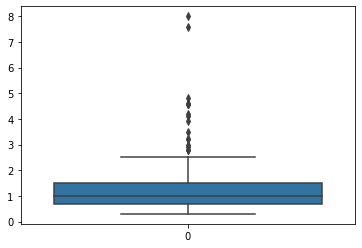

In [3]:
def lf_uf(df, nome_attr):
    sns.boxplot(data=df[nome_attr])

    df = df.copy(deep=True)
    
    Q1 = df[nome_attr].quantile(0.25)
    Q3 = df[nome_attr].quantile(0.75)
    IQR = Q3 - Q1
    
    lf = Q1 - 1.5 * IQR
    uf = Q3 + 1.5 * IQR
    
    print(f"Lower Fence:  {lf}")
    print(f"Upper Fence: {uf}")
    
    df[nome_attr] = np.where((df[nome_attr] < lf), lf, df[nome_attr])
    df[nome_attr] = np.where((df[nome_attr] > uf), uf, df[nome_attr])
    
    sns.boxplot(data=df[nome_attr])

lf_uf(data, "BILIRUBIN")

Para os próximos exercícios você pode continuar usando o conjunto de dados sem outliers no atributo analisado, ou usar os dados originais.

### Questão 02. 

Crie uma lista com atributos numéricos e outra com os atributos categóricos da base. Verifique quantos são numéricos e quantos são categóricos.

- Lembre-se de não considerar o atributo classe.

In [ ]:
data.head()

In [ ]:
features_numericos = ["AGE", "BILIRUBIN", "ALK_PHOSPHATE", "SGOT", "ALBUMIN"]

features_categoricos = ["SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER_BIG", "LIVER_FIRM", "SPLEEN_PALPABLE", "SPIDERS", "ASCITES","VARICES"]

### Questão 03.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média - `mean` (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes - `most_frequent` (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def transformar_base(df, features_numericos, features_categoricos):
    
    # Criando os pipelines
    pipeline_numerico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    pipeline_categorico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())])

    # Criando a transformação do conjunto de dados:
    transformacao = ColumnTransformer(
        transformers=[
            ('transformacao numerica', pipeline_numerico, features_numericos),
            ('transformacao categorica', pipeline_categorico, features_categoricos),        
        ])

    # Aplicando a transformação no dataset:
    dados_transformados = transformacao.fit_transform(df)
    
    return dados_transformados
#     dados_transformados.round(2)

In [ ]:
transformar_base(data, features_numericos, features_categoricos)

### Questão 04

Compare o número de atributos antes e depois do pre-processamento. 


Resposta:

In [ ]:
transform_data = transformar_base(data, features_numericos, features_categoricos)

print(f"Número de atributos antes do processamento: {data.shape[1]}")
print(f"Número de atributos depois do processamento: {transform_data.shape[1]}")

### Questão 05

Cite uma vantagem e uma desvantagem do pre-processamento realizado

Resposta: 

In [ ]:
print("A vantagem é que é mais fácil de usar esses dados para fazer análise mais detalhada (e.g. Aprendizado de Máquina)")